In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from fbprophet import Prophet
# import plotly.plotly as py
import plotly.graph_objs as go
import statsmodels.api as sm
import warnings
import itertools

In [2]:
ls  = pd.read_csv('C:/Users/RISHABH/Documents/SawerANN_prediction.csv')

In [3]:
ls

,Date,ANN_prediction
0,04-Jan-17,2915.0586
1,06-Jan-17,2915.0586
2,07-Jan-17,2915.0586
3,09-Jan-17,2915.0586
4,10-Jan-17,2915.0586
5,11-Jan-17,2915.0586
6,12-Jan-17,2915.0586
7,13-Jan-17,2915.0586
8,16-Jan-17,2915.0586
9,17-Jan-17,2915.0586


In [4]:
ls["Date"] = pd.to_datetime(ls["Date"], format="%d-%b-%y")

In [5]:
ls

,Date,ANN_prediction
0,2017-01-04,2915.0586
1,2017-01-06,2915.0586
2,2017-01-07,2915.0586
3,2017-01-09,2915.0586
4,2017-01-10,2915.0586
5,2017-01-11,2915.0586
6,2017-01-12,2915.0586
7,2017-01-13,2915.0586
8,2017-01-16,2915.0586
9,2017-01-17,2915.0586


In [6]:
ls=ls.set_index('Date')

In [7]:
ls

,ANN_prediction
Date,
2017-01-04,2915.0586
2017-01-06,2915.0586
2017-01-07,2915.0586
2017-01-09,2915.0586
2017-01-10,2915.0586
2017-01-11,2915.0586
2017-01-12,2915.0586
2017-01-13,2915.0586
2017-01-16,2915.0586


In [8]:
data = ls.copy()
y = data

In [9]:
y = y['ANN_prediction']

In [10]:
y

Date
2017-01-04    2915.0586
2017-01-06    2915.0586
2017-01-07    2915.0586
2017-01-09    2915.0586
2017-01-10    2915.0586
2017-01-11    2915.0586
2017-01-12    2915.0586
2017-01-13    2915.0586
2017-01-16    2915.0586
2017-01-17    2915.0586
2017-01-20    2915.0586
2017-01-21    2915.0586
2017-01-23    2915.0586
2017-01-25    2915.0586
2017-01-27    2915.0586
2017-01-28    2915.0586
2017-01-30    2915.0586
2017-01-31    2915.0586
2017-02-01    2925.2498
2017-02-02    2925.2498
2017-02-03    2925.2498
2017-02-04    2925.2498
2017-02-07    2925.2498
2017-02-08    2925.2498
2017-02-09    2925.2498
2017-02-11    2925.2498
2017-02-13    2925.2498
2017-02-14    2925.2498
2017-02-15    2925.2498
2017-02-16    2925.2498
                ...    
2019-10-23    3499.8855
2019-10-30    3499.8855
2019-10-31    3499.8855
2019-11-01    3466.4543
2019-11-02    3466.4543
2019-11-04    3466.4543
2019-11-05    3466.4543
2019-11-06    3466.4543
2019-11-07    3466.4543
2019-11-08    3466.4543
2019-11-11 

In [11]:
y = y.fillna(y.bfill())
y= y.astype(int)
print(y)

Date
2017-01-04    2915
2017-01-06    2915
2017-01-07    2915
2017-01-09    2915
2017-01-10    2915
2017-01-11    2915
2017-01-12    2915
2017-01-13    2915
2017-01-16    2915
2017-01-17    2915
2017-01-20    2915
2017-01-21    2915
2017-01-23    2915
2017-01-25    2915
2017-01-27    2915
2017-01-28    2915
2017-01-30    2915
2017-01-31    2915
2017-02-01    2925
2017-02-02    2925
2017-02-03    2925
2017-02-04    2925
2017-02-07    2925
2017-02-08    2925
2017-02-09    2925
2017-02-11    2925
2017-02-13    2925
2017-02-14    2925
2017-02-15    2925
2017-02-16    2925
              ... 
2019-10-23    3499
2019-10-30    3499
2019-10-31    3499
2019-11-01    3466
2019-11-02    3466
2019-11-04    3466
2019-11-05    3466
2019-11-06    3466
2019-11-07    3466
2019-11-08    3466
2019-11-11    3466
2019-11-13    3466
2019-11-14    3466
2019-11-15    3466
2019-11-16    3466
2019-11-18    3466
2019-11-19    3466
2019-11-20    3466
2019-11-21    3466
2019-11-22    3466
2019-11-25    3466
2019-11

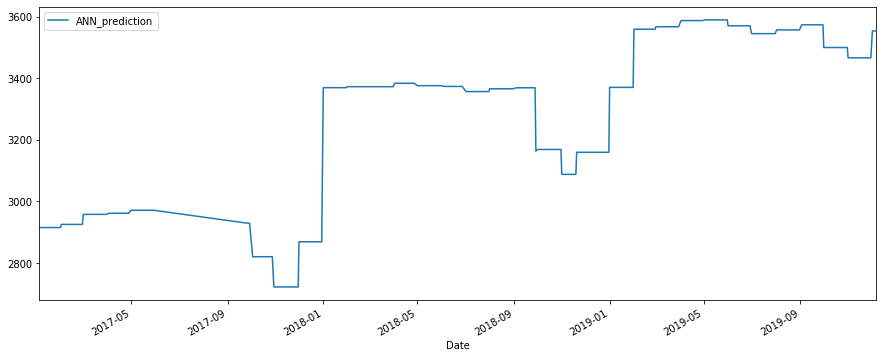

In [12]:
ls.plot(figsize=(15, 6))
plt.show()

In [13]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:162099.77068664908
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10338.101778235474
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6976.194460146912
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6843.916200302336
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6982.235727889449
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6971.482278129619
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6853.729956616899
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6841.000267716205
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10871.728800264387
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9533.641303379838
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6451.858571927958
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6331.440898041847
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6469.9321624856075
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6492.257624301936
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6351.959294153717
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6329.35959188886
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5623.216525819429
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5523.534560369695
ARIMA(0

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0451     14.447     -0.003      0.998     -28.362      28.271
ma.L1          0.0421     14.498      0.003      0.998     -28.373      28.457
ar.S.L12      -0.0018      0.045     -0.041      0.967      -0.089       0.086
ma.S.L12      -1.0000     98.085     -0.010      0.992    -193.242     191.242
sigma2       770.9891   7.56e+04      0.010      0.992   -1.47e+05    1.49e+05


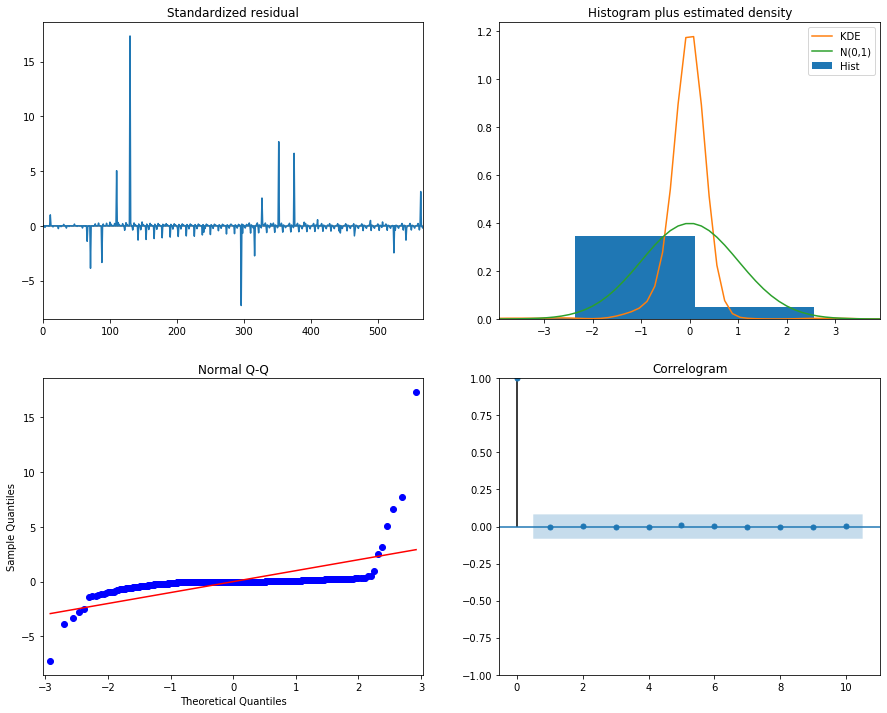

In [17]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

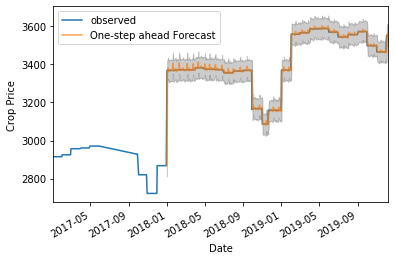

In [19]:
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 958.44


In [21]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

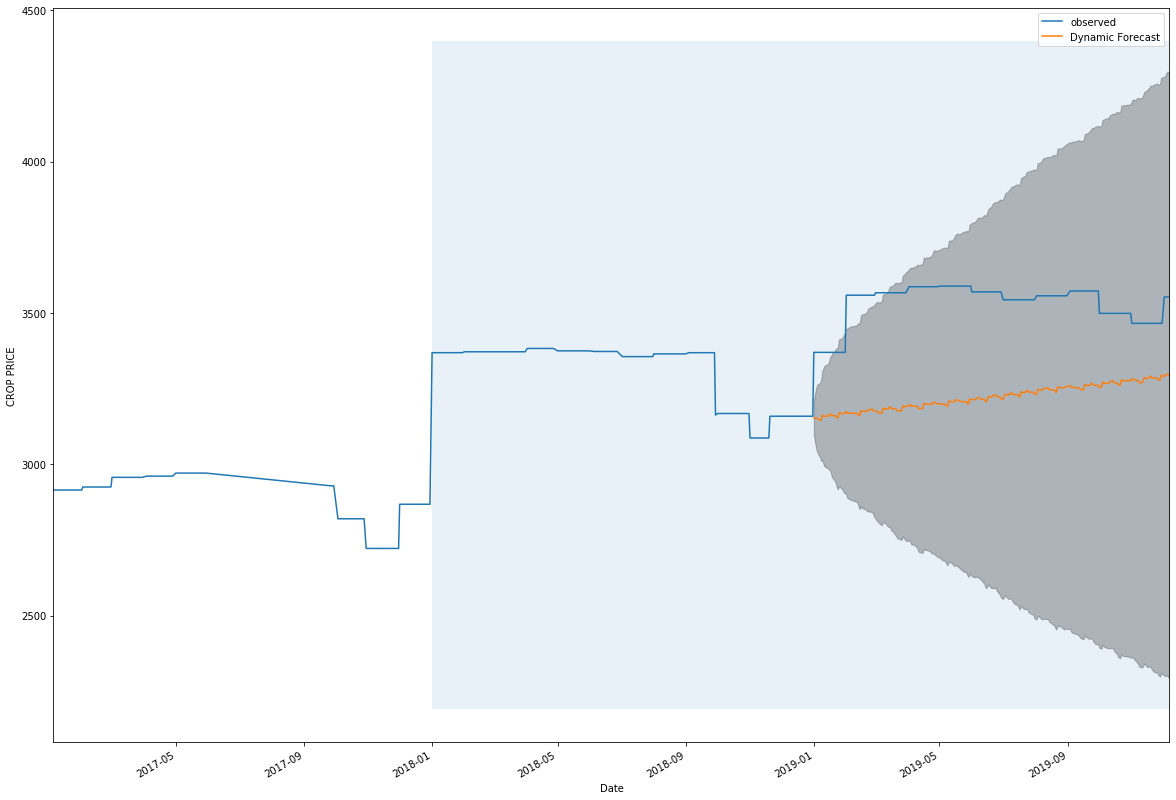

In [22]:

ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [23]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 99777.15


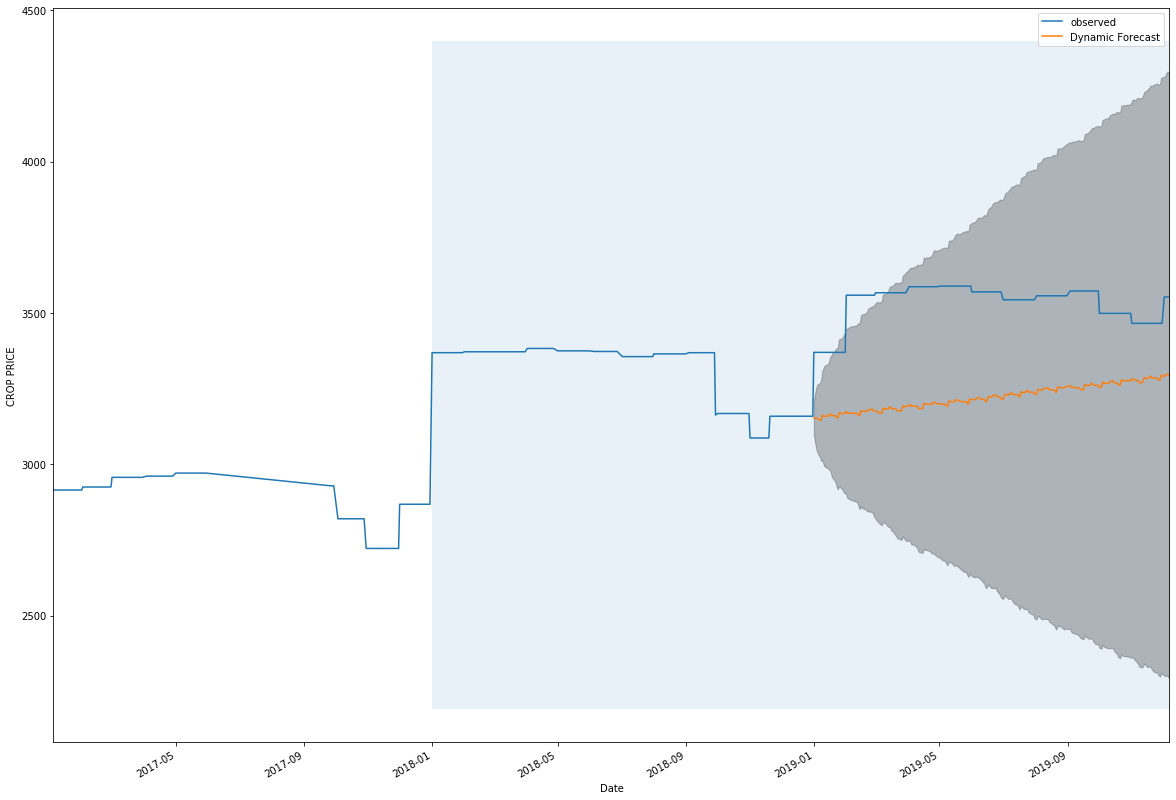

In [24]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [25]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 99777.15


In [26]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [27]:
pred_uc = results.get_forecast(steps=365)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [28]:
pred_ci

,lower ANN_prediction,upper ANN_prediction
596,3498.149372,3608.098805
597,3474.798265,3630.059393
598,3457.475922,3647.545348
599,3437.073193,3656.496550
600,3423.874761,3669.164049
601,3422.568864,3691.245314
602,3410.467227,3700.643093
603,3401.320684,3711.510097
604,3391.921532,3720.909209
605,3385.916647,3732.685031


In [30]:
pred_ci['Average Price'] =((pred_ci['lower ANN_prediction'] + pred_ci['upper ANN_prediction'])/2)

In [31]:
pred_ci

,lower ANN_prediction,upper ANN_prediction,Average Price
596,3498.149372,3608.098805,3553.124089
597,3474.798265,3630.059393,3552.428829
598,3457.475922,3647.545348,3552.510635
599,3437.073193,3656.496550,3546.784871
600,3423.874761,3669.164049,3546.519405
601,3422.568864,3691.245314,3556.907089
602,3410.467227,3700.643093,3555.555160
603,3401.320684,3711.510097,3556.415390
604,3391.921532,3720.909209,3556.415370
605,3385.916647,3732.685031,3559.300839
